In [1]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [2]:
import tensorflow as tf

# Ref: https://www.tensorflow.org/guide/gpu
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


In [3]:
df = pd.read_csv('data/base_data_8Y.csv')
df = df.dropna().copy()
#df['target'] = df['spy_oc_ret'].shift(-1)
#df = df.dropna()

df.index = df['datecol']

df['target'] = df['spy_oc_ret'].shift(-1)
df = df.dropna()
df

,spy_oc_ret,spy_pco_ret,spy_volume,spy_volatility_atr,spy_trend_ichimoku_conv,spy_trend_ichimoku_base,spy_trend_ichimoku_a,spy_trend_ichimoku_b,spy_trend_cci,spy_momentum_rsi,...,month4,month5,month6,month7,month8,month9,month10,month11,month12,target
datecol,,,,,,,,,,,,,,,,,,,,,
2015-01-30,-0.558409,-0.703005,1422361,3.143214,202.47,203.760,203.1150,205.415,-98.111841,41.538888,...,0,0,0,0,0,0,0,0,0,0.929721
2015-02-02,0.929721,0.305841,1314424,3.245892,202.06,203.415,202.7375,205.415,-76.015134,47.585237,...,0,0,0,0,0,0,0,0,0,0.906404
2015-02-03,0.906404,0.534865,1035204,3.214303,202.06,203.415,202.7375,205.415,68.015623,53.683827,...,0,0,0,0,0,0,0,0,0,0.068654
2015-02-04,0.068654,-0.449131,1059156,3.079873,201.98,203.415,202.6975,205.415,70.575756,51.945157,...,0,0,0,0,0,0,0,0,0,0.615054
2015-02-05,0.615054,0.392042,778565,2.995885,202.08,203.115,202.5975,205.415,113.473729,55.998374,...,0,0,0,0,0,0,0,0,0,-0.488962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,-0.347358,0.274725,530326,6.613262,401.33,389.395,395.3625,379.055,122.555934,63.392394,...,0,0,0,0,0,0,0,0,1,1.160998
2022-12-02,1.160998,-1.261721,513953,6.523936,401.33,389.395,395.3625,379.055,109.592125,62.875939,...,0,0,0,0,0,0,0,0,1,-1.079342
2022-12-05,-1.079342,-0.727434,501248,6.745542,401.65,389.395,395.5225,379.055,61.395549,55.317131,...,0,0,0,0,0,0,0,0,1,-1.399529


In [27]:


X = df[df.columns[~df.columns.isin(
    ['datecol', 'target','trade_date','target_1','target_2','target_3'])]]
y = np.where(df['target']>0.5,1,0)
y = np.where(df['target']<-0.5,2,y)


In [51]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

X_scale = pd.DataFrame(X_scale,columns=X.columns)


pca = PCA(n_components=0.95)
X_scale_pca = pca.fit(X_scale).transform(X)
X_scale_pca = scaler.fit_transform(X_scale_pca)

#lda = LinearDiscriminantAnalysis(n_components=0.95)
#X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio: %s"
    % str(pca.explained_variance_ratio_)
)
# 34 components explain 95% of the variance


explained variance ratio: [0.18956898 0.17664966 0.05994892 0.04038154 0.03530563 0.03150615
 0.0302203  0.02672012 0.02520955 0.02409801 0.02269742 0.02238086
 0.0205967  0.01989442 0.01934138 0.01881902 0.01789345 0.01694103
 0.01628432 0.01575509 0.01394537 0.01290852 0.01112449 0.01060736
 0.00856282 0.00809226 0.00799499 0.00744711 0.0073028  0.00723734
 0.00710082 0.00701599 0.00692099 0.00670956]


In [52]:
len(pca.feature_names_in_)

134

In [53]:
pca.n_features_

134

In [54]:
len(pca.explained_variance_)

34

In [55]:
sum(pca.explained_variance_ratio_)

0.9531829710076309

In [56]:
np.shape(X_scale)

(1964, 134)

In [59]:
np.shape(X_scale_pca)

(1964, 34)

In [58]:
X_scale_pca

array([[0.372901  , 0.54509155, 0.61876854, ..., 0.0214289 , 0.65102717,
        0.898274  ],
       [0.34079912, 0.57458548, 0.65017516, ..., 0.02416362, 0.63149669,
        0.90359351],
       [0.25803024, 0.64672745, 0.73183554, ..., 0.02395273, 0.58543664,
        0.92435023],
       ...,
       [0.12766627, 0.82619405, 0.88970844, ..., 0.01072402, 0.50176815,
        0.96861775],
       [0.14570127, 0.81044989, 0.87192656, ..., 0.01076239, 0.51180374,
        0.9640497 ],
       [0.10585689, 0.84519998, 0.91131808, ..., 0.0106432 , 0.48961574,
        0.97395451]])

In [60]:

'''
spy_oc_ret
spy_pco_ret
spy_volume
spy_volatility_atr
spy_trend_ichimoku_conv
spy_trend_ichimoku_base
spy_trend_ichimoku_a
spy_trend_ichimoku_b
spy_trend_cci
spy_momentum_rsi
spy_trend_macd
spy_trend_macd_signal
spy_momentum_ppo
spy_momentum_ppo_signal
spy_bull
spy_bear
spy_neutral
trade_date
vix_oc_ret
vix_pco_ret
vix_prev_close
vix_prev_open
vix_close
vix_bull
vix_bear
vix_neutral
jnk_oc_ret
jnk_pco_ret
jnk_prev_close
jnk_prev_open
jnk_close
jnk_bull
jnk_bear
jnk_neutral
hyg_oc_ret
hyg_pco_ret
hyg_prev_close
hyg_prev_open
hyg_close
hyg_bull
hyg_bear
hyg_neutral
xle_oc_ret
xle_pco_ret
xle_prev_close
xle_prev_open
xle_close
xle_bull
xle_bear
xle_neutral
xlf_oc_ret
xlf_pco_ret
xlf_prev_close
xlf_prev_open
xlf_close
xlf_bull
xlf_bear
xlf_neutral
xlk_oc_ret
xlk_pco_ret
xlk_prev_close
xlk_prev_open
xlk_close
xlk_bull
xlk_bear
xlk_neutral
xlu_oc_ret
xlu_pco_ret
xlu_prev_close
xlu_prev_open
xlu_close
xlu_bull
xlu_bear
xlu_neutral
xlv_oc_ret
xlv_pco_ret
xlv_prev_close
xlv_prev_open
xlv_close
xlv_bull
xlv_bear
xlv_neutral
xli_oc_ret
xli_pco_ret
xli_prev_close
xli_prev_open
xli_close
xli_bull
xli_bear
xli_neutral
dia_oc_ret
dia_pco_ret
dia_prev_close
dia_prev_open
dia_close
dia_bull
dia_bear
dia_neutral
gld_oc_ret
gld_pco_ret
gld_prev_close
gld_prev_open
gld_close
gld_bull
gld_bear
gld_neutral
datecol
week
year
month
Real_PCE
Real_PCE_YoY
Initial_Claims
Initial_Claims_YoY
USD_Daily_Return
Inflation Rate
10yr minus 2yr yield
Inversion Signal
US_Personal_Savings_Rate
US_Real_Disposable_Income
M2_and_Components
Job_Openings_Total_Nonfarm
St_Louis_Fed_Fin_Stress_Index
Chicago_Fed_Fin_Conditions_Index
month1
month2
month3
month4
month5
month6
month7
month8
month9
month10
month11
month12
'''

'\nspy_oc_ret\nspy_pco_ret\nspy_volume\nspy_volatility_atr\nspy_trend_ichimoku_conv\nspy_trend_ichimoku_base\nspy_trend_ichimoku_a\nspy_trend_ichimoku_b\nspy_trend_cci\nspy_momentum_rsi\nspy_trend_macd\nspy_trend_macd_signal\nspy_momentum_ppo\nspy_momentum_ppo_signal\nspy_bull\nspy_bear\nspy_neutral\ntrade_date\nvix_oc_ret\nvix_pco_ret\nvix_prev_close\nvix_prev_open\nvix_close\nvix_bull\nvix_bear\nvix_neutral\njnk_oc_ret\njnk_pco_ret\njnk_prev_close\njnk_prev_open\njnk_close\njnk_bull\njnk_bear\njnk_neutral\nhyg_oc_ret\nhyg_pco_ret\nhyg_prev_close\nhyg_prev_open\nhyg_close\nhyg_bull\nhyg_bear\nhyg_neutral\nxle_oc_ret\nxle_pco_ret\nxle_prev_close\nxle_prev_open\nxle_close\nxle_bull\nxle_bear\nxle_neutral\nxlf_oc_ret\nxlf_pco_ret\nxlf_prev_close\nxlf_prev_open\nxlf_close\nxlf_bull\nxlf_bear\nxlf_neutral\nxlk_oc_ret\nxlk_pco_ret\nxlk_prev_close\nxlk_prev_open\nxlk_close\nxlk_bull\nxlk_bear\nxlk_neutral\nxlu_oc_ret\nxlu_pco_ret\nxlu_prev_close\nxlu_prev_open\nxlu_close\nxlu_bull\nxlu_bear\

In [61]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

<AxesSubplot:xlabel='spy_trend_cci', ylabel='Count'>

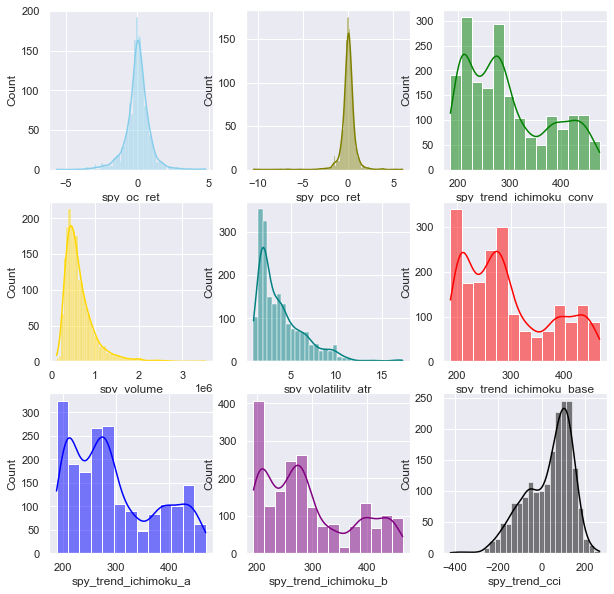

In [70]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[0], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[1], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[2], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[3], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[4], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[5], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[6], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[7], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[8], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='trade_date', ylabel='Count'>

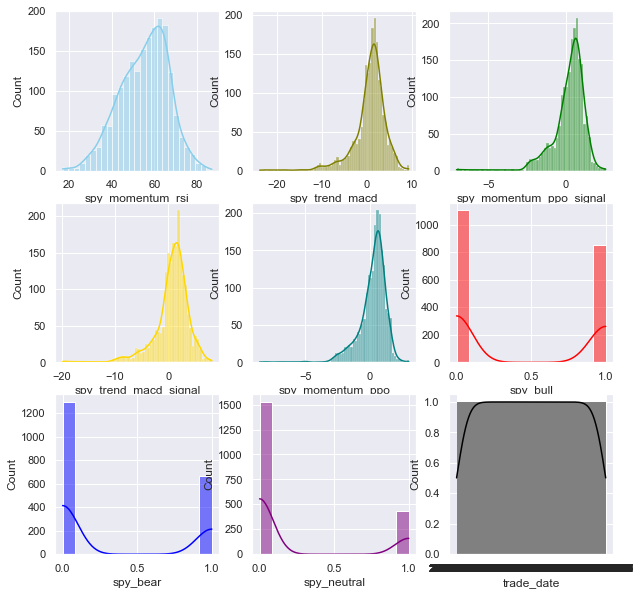

In [69]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[9], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[10], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[11], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[12], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[13], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[14], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[15], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[16], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[17], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='jnk_oc_ret', ylabel='Count'>

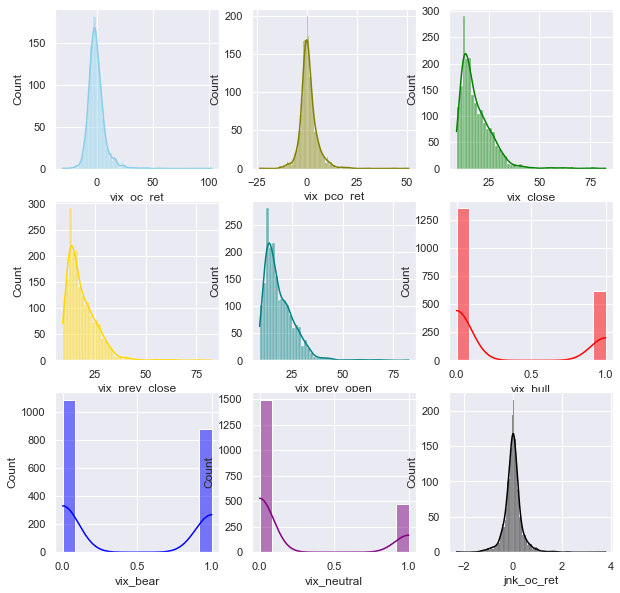

In [71]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[18], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[19], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[20], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[21], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[22], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[23], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[24], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[25], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[26], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='hyg_pco_ret', ylabel='Count'>

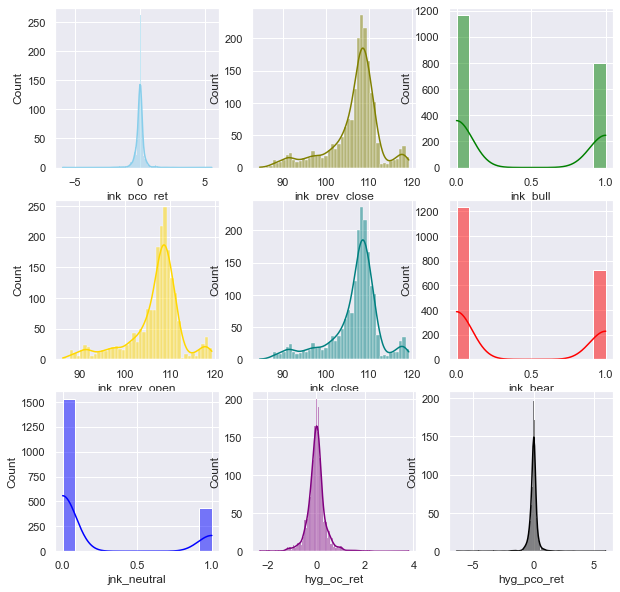

In [72]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[27], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[28], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[29], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[30], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[31], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[32], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[33], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[34], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[35], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='xle_prev_close', ylabel='Count'>

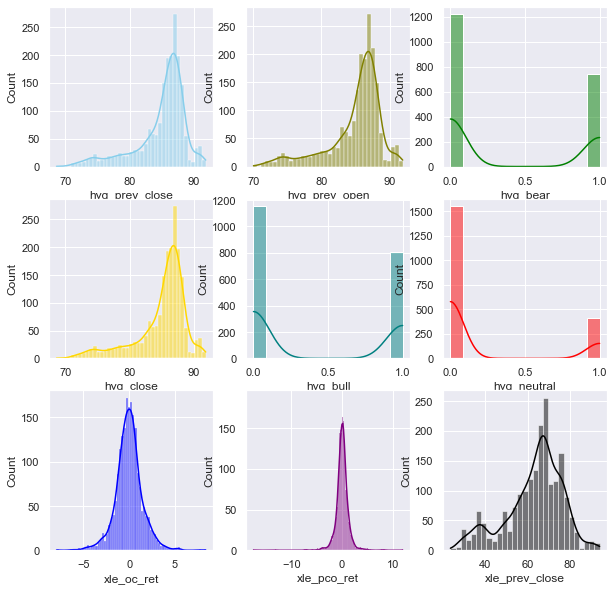

In [73]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[36], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[37], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[38], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[39], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[40], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[41], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[42], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[43], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[44], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='xlf_prev_open', ylabel='Count'>

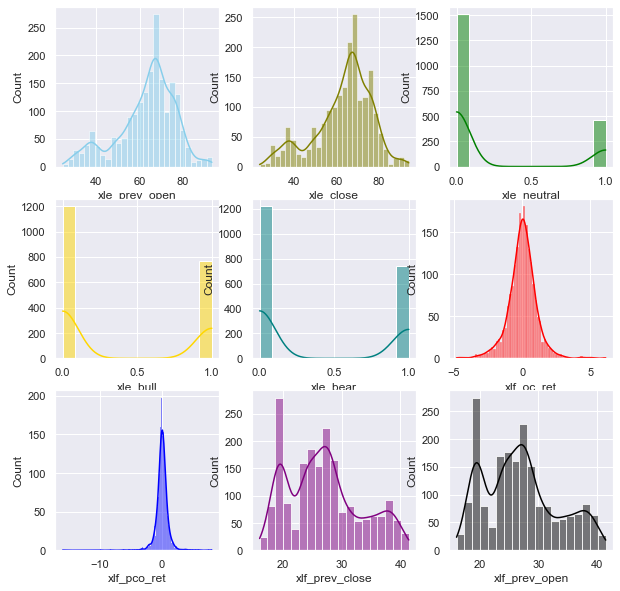

In [74]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[45], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[46], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[47], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[48], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[49], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[50], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[51], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[52], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[53], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='xlk_close', ylabel='Count'>

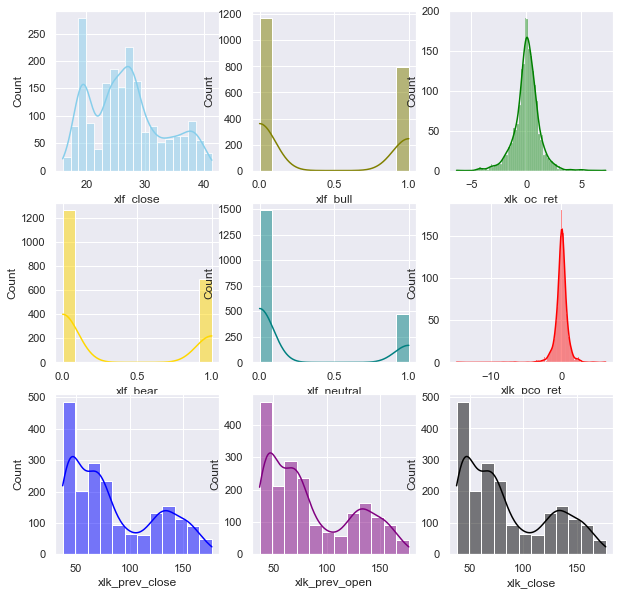

In [75]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[54], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[55], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[56], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[57], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[58], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[59], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[60], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[61], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[62], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='xlu_bull', ylabel='Count'>

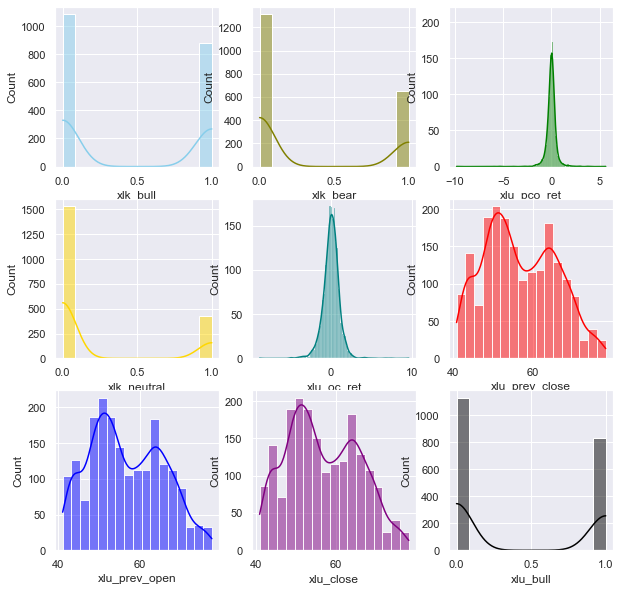

In [76]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[63], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[64], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[65], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[66], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[67], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[68], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[69], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[70], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[71], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='xlv_bear', ylabel='Count'>

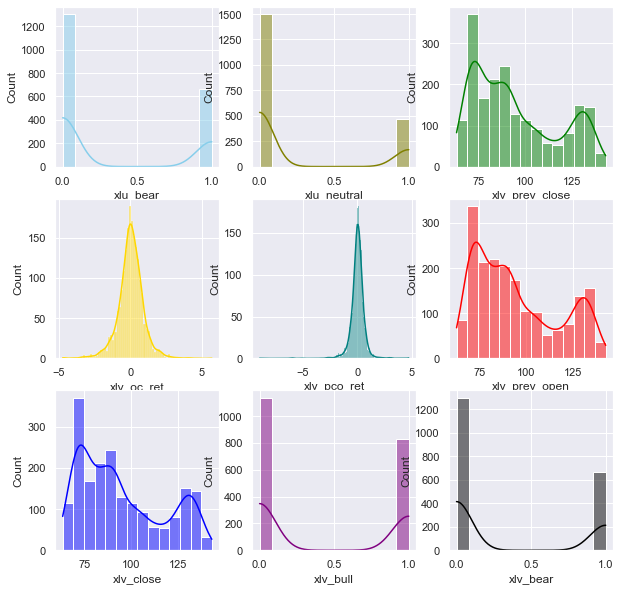

In [77]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[72], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[73], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[74], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[75], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[76], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[77], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[78], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[79], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[80], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='xli_neutral', ylabel='Count'>

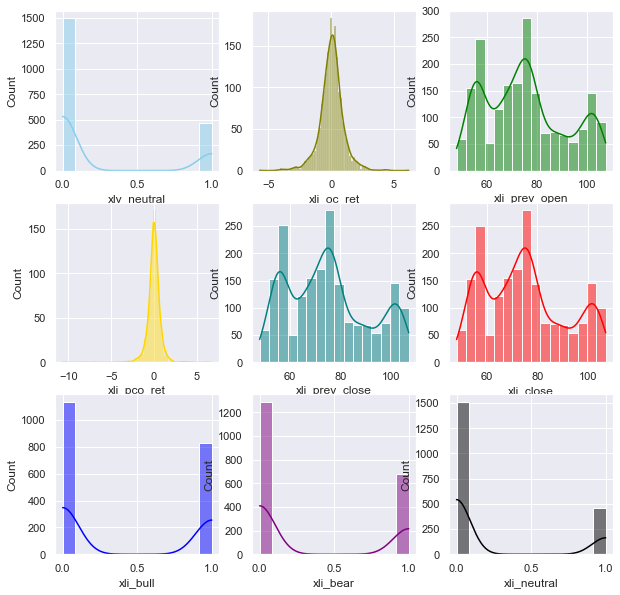

In [78]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[81], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[82], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[83], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[84], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[85], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[86], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[87], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[88], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[89], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='gld_oc_ret', ylabel='Count'>

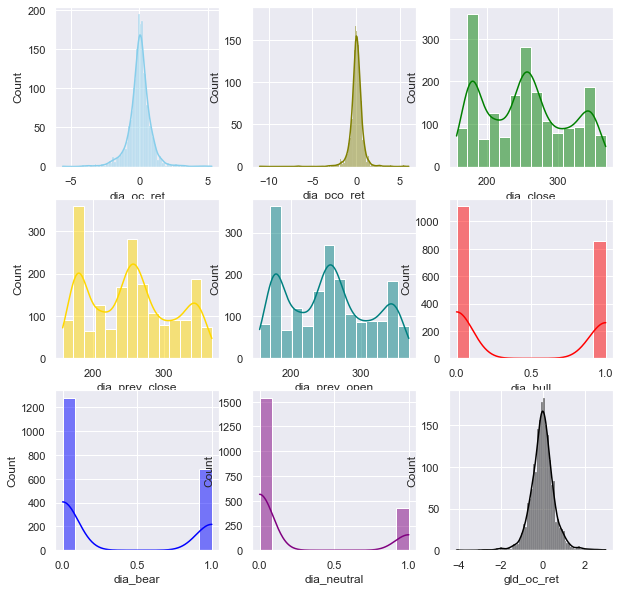

In [79]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[90], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[91], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[92], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[93], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[94], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[95], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[96], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[97], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[98], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='week', ylabel='Count'>

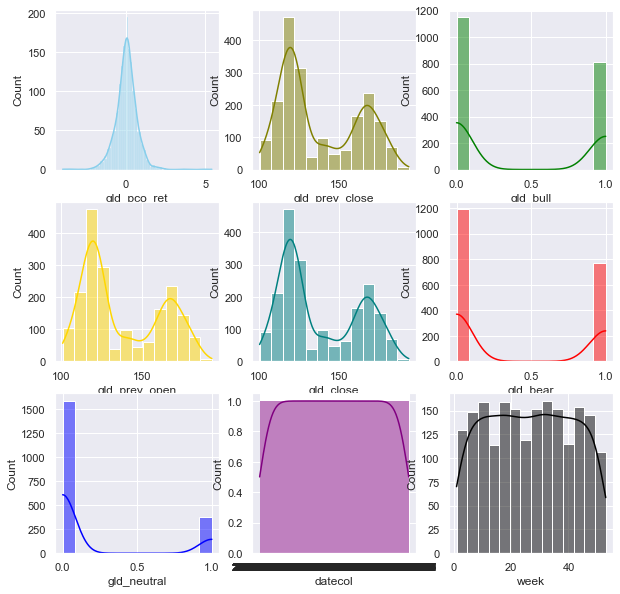

In [80]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[99], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[100], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[101], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[102], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[103], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[104], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[105], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[106], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[107], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='10yr minus 2yr yield', ylabel='Count'>

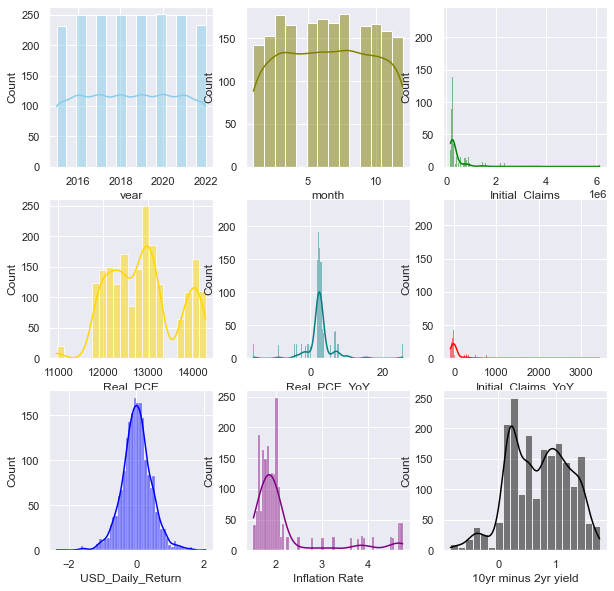

In [82]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[108], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[109], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[110], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[111], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[112], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[113], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[114], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[115], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[116], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='month2', ylabel='Count'>

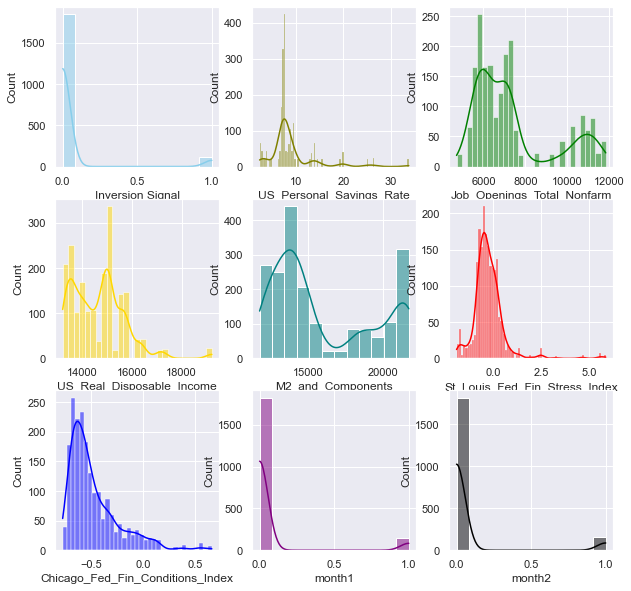

In [83]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[117], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[118], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[119], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[120], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[121], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[122], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[123], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[124], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[125], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='month11', ylabel='Count'>

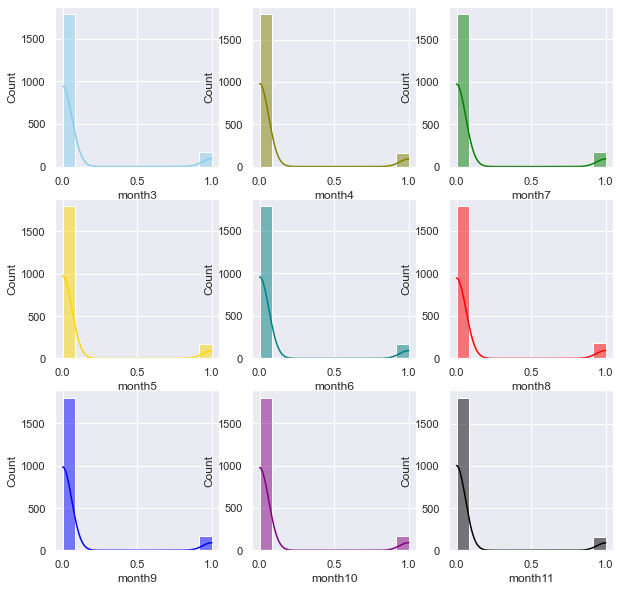

In [84]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[126], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[127], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[128], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[129], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[130], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[131], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[132], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[133], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[134], kde=True, color="black", ax=axs[2, 2])

<AxesSubplot:xlabel='month12', ylabel='Count'>

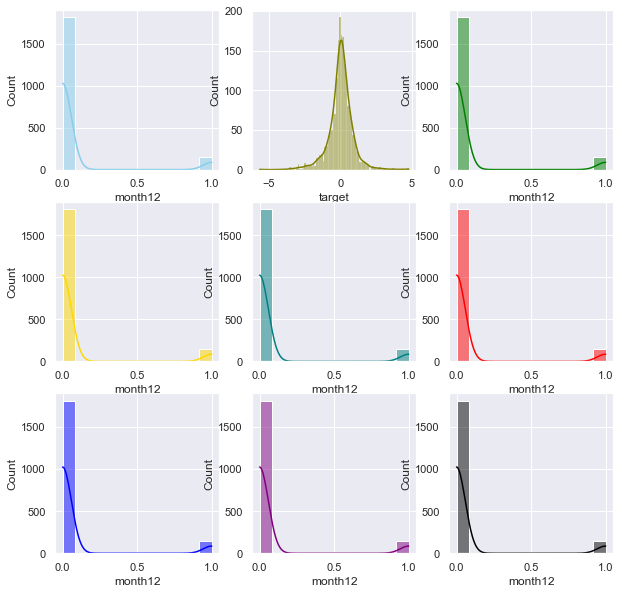

In [85]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

sns.histplot(data=df, x=df.columns[135], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x=df.columns[136], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x=df.columns[135], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x=df.columns[135], kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x=df.columns[135], kde=True, color="green", ax=axs[0, 2])
sns.histplot(data=df, x=df.columns[135], kde=True, color="red", ax=axs[1, 2])
sns.histplot(data=df, x=df.columns[135], kde=True, color="blue", ax=axs[2, 0])
sns.histplot(data=df, x=df.columns[135], kde=True, color="purple", ax=axs[2, 1])
sns.histplot(data=df, x=df.columns[135], kde=True, color="black", ax=axs[2, 2])

In [91]:
df1 = df.copy()

In [137]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


scaler = MinMaxScaler()
#df1['Chicago_Fed_Fin_Conditions_Index'] = scaler.fit_transform(df['Chicago_Fed_Fin_Conditions_Index'].values.reshape(-1, 1))


df1['Chicago_Fed_Fin_Conditions_Index'] = df['Chicago_Fed_Fin_Conditions_Index'] ** 2


df1['spy_volume'] = np.log2(df['spy_volume'])


#data['logarithm_base2'] = np.log2(data['Salary'])






<AxesSubplot:xlabel='Chicago_Fed_Fin_Conditions_Index', ylabel='Count'>

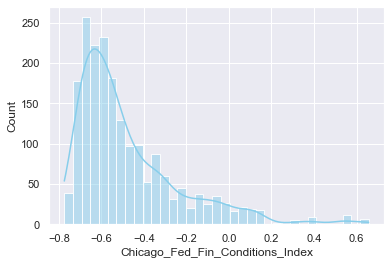

In [138]:
sns.histplot(data=df, x=df.columns[123], kde=True, color="skyblue")

<AxesSubplot:xlabel='Chicago_Fed_Fin_Conditions_Index', ylabel='Count'>

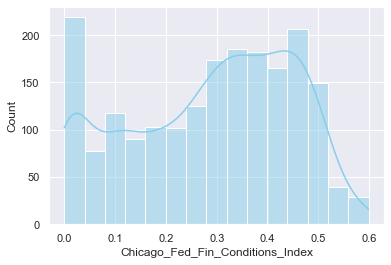

In [139]:
sns.histplot(data=df1, x=df1.columns[123], kde=True, color="skyblue")

<AxesSubplot:xlabel='spy_volume', ylabel='Count'>

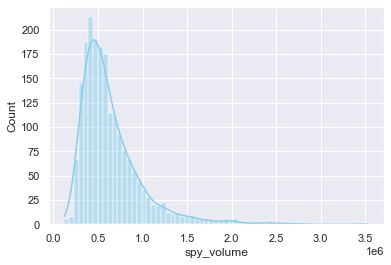

In [140]:
sns.histplot(data=df, x=df.columns[2], kde=True, color="skyblue")

<AxesSubplot:xlabel='spy_volume', ylabel='Count'>

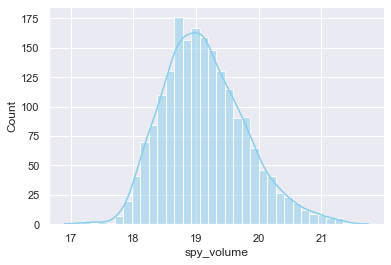

In [141]:
sns.histplot(data=df1, x=df1.columns[2], kde=True, color="skyblue")

<AxesSubplot:xlabel='spy_oc_ret', ylabel='Count'>

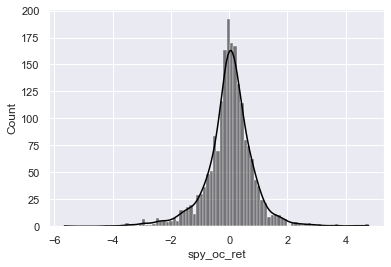

In [142]:
sns.histplot(data=df, x=df.columns[0], kde=True, color="black")

In [166]:
df['target_2'] = np.where(df['target']<=0,1,0)
df['target_2'] = np.where(df['target']>0,2,df['target_2'])
df['target_2'] = np.where(df['target']>0.5,3,df['target_2'])
df['target_2'] = np.where(df['target']<-0.5,4,df['target_2'])

In [167]:
df['target_2'].value_counts()

2    640
1    545
3    416
4    363
Name: target_2, dtype: int64

<AxesSubplot:xlabel='target_2', ylabel='Count'>

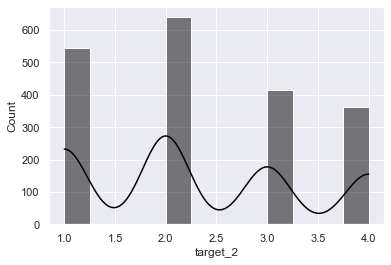

In [168]:
sns.histplot(data=df, x=df.columns[137], kde=True, color="black")